<a href="https://colab.research.google.com/github/VaniKandhasamy/15Z702---Data-Analytics-Lab/blob/master/Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Data Preprocessing Tools**

**Importing the libraries:**

In order to perform data preprocessing using Python, we need to import some predefined Python libraries.

In [2]:
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from sklearn.preprocessing import Normalizer # used for feature scaling

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the dataset:**

To create a machine learning model, the first thing we required is a dataset as a machine learning model completely works on data. The collected data for a particular problem in a proper format is known as the dataset.

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/NFL Play by Play 2009-2018 (v5).csv') # to import the dataset into a variable
# Splitting the attributes into independent and dependent attributes
#X = dataset.iloc[:, :-1].values # attributes to determine dependent variable / Class
#Y = dataset.iloc[:, -1].values # dependent variable / Class

<ipython-input-6-394a406f9e13>:1: DtypeWarning: Columns (42,166,167,168,169,174,175,178,179,182,183,188,189,190,191,194,195,203,204,205,218,219,220,231,232,233,238,240,241,249) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/drive/MyDrive/NFL Play by Play 2009-2018 (v5).csv') # to import the dataset into a variable


In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [8]:
dataset_copy = dataset.copy()

In [13]:
dataset_copy['down']

0         NaN
1         1.0
2         2.0
3         3.0
4         4.0
         ... 
449366    2.0
449367    3.0
449368    4.0
449369    1.0
449370    NaN
Name: down, Length: 449371, dtype: float64

In [27]:
dataset_copy.dtypes

play_id                            int64
game_id                            int64
home_team                         object
away_team                         object
posteam                           object
                                  ...   
penalty_type                      object
defensive_two_point_attempt      float64
defensive_two_point_conv         float64
defensive_extra_point_attempt    float64
defensive_extra_point_conv       float64
Length: 255, dtype: object

In [31]:
categorical_data.describe()

,home_team,away_team,posteam,posteam_type,defteam,side_of_field,game_date,game_half,time,yrdln,...,fumble_recovery_1_player_name,fumble_recovery_2_team,fumble_recovery_2_player_id,fumble_recovery_2_player_name,return_team,penalty_team,penalty_player_id,penalty_player_name,replay_or_challenge_result,penalty_type
count,449371,449371,436129,436492,436492,448771,449371,449371,449230,448771,...,6027,47,47,46,30605,32636,32636,31207,812,31139
unique,35,35,35,2,35,36,472,3,1802,1769,...,2156,26,47,46,35,35,4066,3572,2,64
top,PHI,NE,NE,home,PHI,OAK,2018-11-11,Half2,15:00,MID 50,...,R.Wilson,PHI,0,J.Jackson,KC,OAK,0,A.Smith,upheld,Offensive Holding
freq,14510,14547,14269,219059,14038,14633,4100,223962,11782,5175,...,34,5,1,1,1092,1271,1429,157,452,6250


In [9]:
#Multivariate imputer that estimates missing values by modeling each feature
#with missing values as a function of other features in a round-robin fashion.
imputer = IterativeImputer(max_iter=10, random_state=0)
# fit the transform for the variable down
imputed_values = imputer.fit_transform(dataset_copy['down'].values.reshape(-1, 1))
# drop the varible with missing values
dataset_copy.drop(['down'], axis=1)
# replace the variable drop with the imputed values
dataset_copy['down'] = imputed_values


In [22]:
dataset_copy['down'] = imputed_values

In [24]:
dataset_copy.down.unique()

array([1.99990299, 1.        , 2.        , 3.        , 4.        ])

<Axes: title={'center': 'down'}>

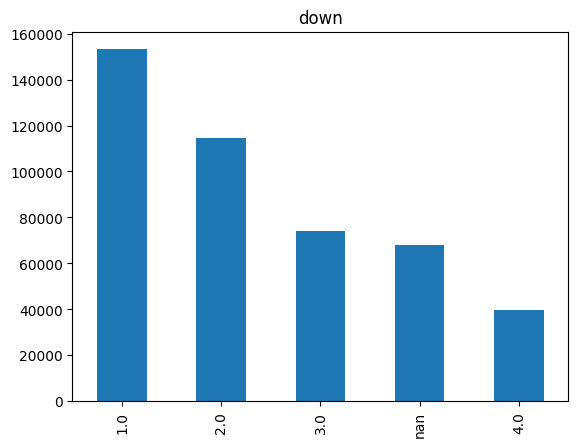

In [25]:
counts = dataset['down'].value_counts(dropna=False)

counts.plot.bar(title='down', grid=False)

<Axes: title={'center': 'down'}>

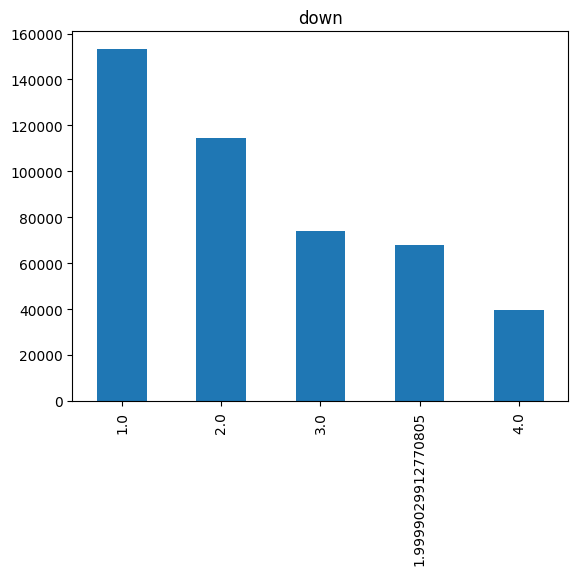

In [26]:
counts = dataset_copy['down'].value_counts(dropna=False)

counts.plot.bar(title='down', grid=False)

In [ ]:
#impute_multi = IterativeImputer(max_iter=10, random_state=0)

In [ ]:
#column_trans = ColumnTransformer([('impute_down', impute_multi, ['down'])],
                                 remainder='passthrough')

In [ ]:
column_names = dataset_copy.columns

In [ ]:
#Fitting columntransformer object to the dataset
dataset_copy = column_trans.fit_transform(dataset_copy)

In [ ]:
#SimpleImputer will return an array instead of dataframe. So convert it to dataframe.
dataset_imputed = pd.DataFrame(dataset_copy, columns = column_names).reset_index(drop='index')

In [ ]:
dataset.down.unique()

array([nan,  1.,  2.,  3.,  4.])

dataset_imputed.penalty_yards.unique()

In [ ]:
dataset.sample(5)

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
18707,3207,2009110104,DET,STL,STL,away,DET,DET,49.0,2009-11-01,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
16621,2942,2009102501,CLE,GB,GB,away,CLE,GB,65.0,2009-10-25,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
6299,627,2009092704,MIN,SF,SF,away,MIN,SF,83.0,2009-09-27,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
10647,755,2009100500,MIN,GB,GB,away,MIN,MIN,2.0,2009-10-05,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0
4026,1025,2009092003,JAC,ARI,JAC,home,ARI,ARI,28.0,2009-09-20,...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [ ]:
#dataset.penalty_yards.unique()
dataset.posteam.unique()

array(['PIT', 'TEN', nan, 'CLE', 'MIN', 'NO', 'DET', 'DAL', 'TB', 'HOU',
       'NYJ', 'IND', 'JAC', 'DEN', 'CIN', 'CAR', 'PHI', 'KC', 'BAL',
       'ATL', 'MIA', 'ARI', 'SF', 'STL', 'SEA', 'NYG', 'WAS', 'GB', 'CHI',
       'NE', 'BUF', 'OAK', 'SD'], dtype=object)

array([[<Axes: title={'center': 'penalty_yards'}>]], dtype=object)

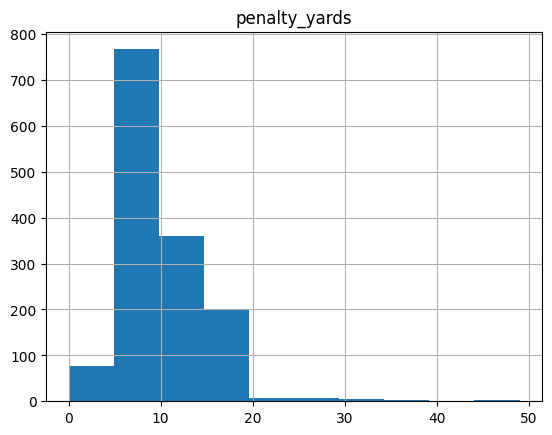

In [ ]:
dataset['penalty_yards']=dataset['penalty_yards'].astype(float)
dataset.hist(column='penalty_yards')

In [ ]:
dataset.penalty_yards.replace(np.nan, '?').value_counts().plot(kind='bar')

<Axes: title={'center': 'penalty_yards'}>

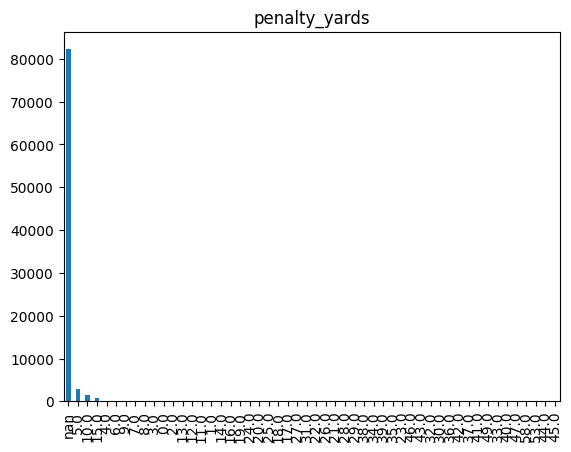

In [ ]:
counts = dataset['penalty_yards'].value_counts(dropna=False)

counts.plot.bar(title='penalty_yards', grid=False)

<Axes: title={'center': 'posteam'}>

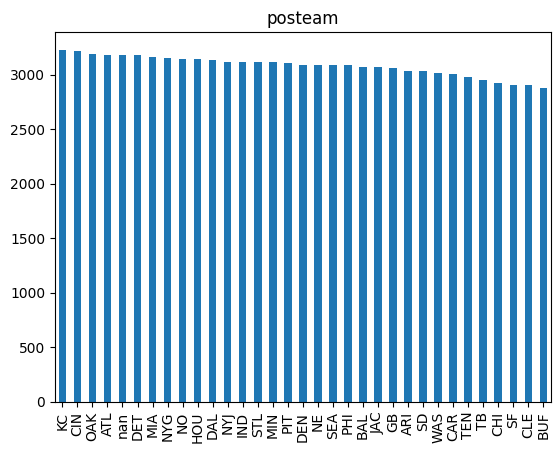

In [ ]:
counts = dataset['posteam'].value_counts(dropna=False)

counts.plot.bar(title='posteam', grid=False)

**Handling of Missing Data:**

If our dataset contains some missing data, then it may create a huge problem for our machine learning model. So the missing values are to dealt properly. There are mainly two ways to handle missing data, which are:

*  By deleting the particular row
*  By calculating the mean/median/mode of the column

If the number of rows having the missing values are less, or it is advised not to fill in missing values, then we can drop the missing rows by using dropna() in pandas.

In [ ]:
dataset.dropna()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,...,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv


In [ ]:
# remove all columns with at least one missing value
dataset_nona_columns = dataset.dropna(axis=1)
dataset_nona_columns.head()

,play_id,game_id,home_team,away_team,game_date,game_half,quarter_end,drive,sp,qtr,...,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa
0,46,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,68,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,0.00000,0.00000,0.077907,-0.077907,-0.938735,0.938735,1.016643,-1.016643,-0.938735,0.938735
2,92,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,-1.40276,1.40276,0.077907,-0.077907,-0.938735,0.938735,1.016643,-1.016643,-0.938735,0.938735
3,113,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,-1.40276,1.40276,-1.634676,1.634676,-0.938735,0.938735,1.016643,-1.016643,2.473837,-2.473837
4,139,2009091000,PIT,TEN,2009-09-10,Half1,0,1,0,1,...,-1.40276,1.40276,-1.634676,1.634676,-0.938735,0.938735,1.016643,-1.016643,2.473837,-2.473837


In [ ]:
from sklearn.impute import SimpleImputer
# handling the missing data and replace missing values with nan from numpy and replace with mean of all the other values
impute_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#ColumnTransformer allows different transformation to different columns
column_trans = ColumnTransformer([('impute_posteam', impute_mode, ['posteam'])],
                                 remainder='passthrough')
#Fitting imputer object to the independent variables
#index = dataset.columns.get_loc('penalty_yards')
#imputer.fit(dataset[:, index])
#Replacing missing data with the calculated mean value
#dataset[:, index] = imputer.transform(dataset[:, index])

In [ ]:
column_names = dataset.columns
#Fitting columntransformer object to the dataset
dataset = column_trans.fit_transform(dataset)

In [ ]:
#SimpleImputer will return an array instead of dataframe. So convert it to dataframe.
dataset_imputed = pd.DataFrame(dataset, columns = column_names).reset_index(drop='index')

In [ ]:
dataset_imputed.penalty_yards.unique()

array([nan, 'T.Polamalu', 'D.Stewart', ..., 'R.Feinga', 'R.Ohrnberger',
       'B.Hoyer'], dtype=object)

<Axes: title={'center': 'posteam'}>

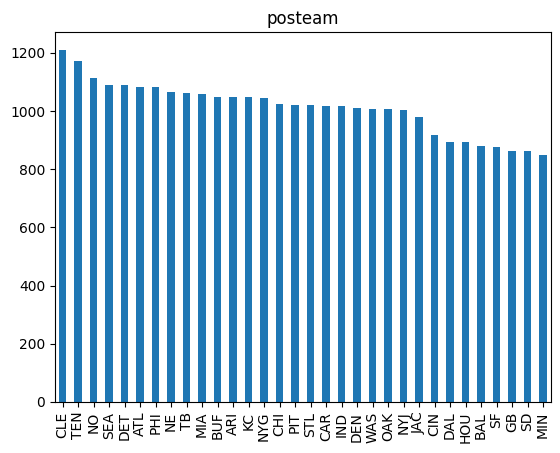

In [ ]:
counts = dataset_imputed['posteam'].value_counts(dropna=False)

counts.plot.bar(title='posteam', grid=False)

**Handling of Categorical Data:**

Categorical data is data which has some categories such as, in our dataset; there are two categorical variable, Country, and Purchased.

Since machine learning models are based on mathematical equations it's intuitive that it would cause some problem if we keep the text here in the equations. So, we need to encode the categorical variables into numbers.

There are 2 common ways to do so.

*   Label Encoding
*   One Hot Encoding



### Encoding the Independent Variable

In [49]:
numeric_data = dataset_copy.select_dtypes(include=[np.number])
categorical_data = dataset_copy.select_dtypes(exclude=[np.number])

In [50]:
categorical_data.dtypes

home_team                     object
away_team                     object
posteam                       object
posteam_type                  object
defteam                       object
                               ...  
penalty_team                  object
penalty_player_id             object
penalty_player_name           object
replay_or_challenge_result    object
penalty_type                  object
Length: 102, dtype: object

In [51]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#posteam_type replay_or_challenge_result
le = LabelEncoder()
#categorical_data['posteam_type']= le.fit_transform(categorical_data['posteam_type'])

In [52]:
categorical_data.apply(le.fit_transform)

TypeError: Encoders require their input to be uniformly strings or numbers. Got ['float', 'str']

In [41]:
categorical_data.posteam_type.unique()

array([1, 0, 2])

In our dataset, there are three country variables which are encoded into 0, 1, and 2. By these values, the machine learning model may assume that there is some correlation between these variables which will produce the wrong output. So to remove this issue,  dummy encoding can be used.

In [ ]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [ ]:
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)

In [ ]:
print(Y)

[0 1 0 0 1 1 0 1 0 1]


**Splitting the dataset into the Training set and Test set:**

Any machine learning algorithm needs to be tested for accuracy. In order to do that, we divide our data set into two parts: training set and testing set. The training set is used to make the algorithm learn the patterns present in the data during training and test dataset is used to check the correctness of the algorithm during testing.

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [ ]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [ ]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [ ]:
print(y_test)

[0 1]


**Feature Scaling:**

It is a technique to standardize the independent variables of the dataset in a specific range. In feature scaling, the variables are brought into same range and in the same scale so that no any variable dominate the other variable.
There are several ways to do so. Following are 2 common ways to normalize/standardize a dataset.





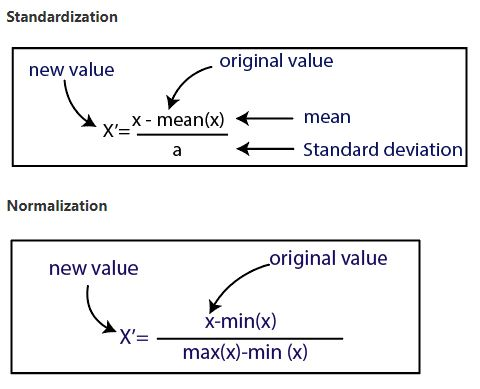


In [ ]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_standard = sc.fit_transform(X_train)
X_test_standard = sc.transform(X_test)

In [ ]:
print(X_train_standard)

[[-0.77459667 -0.57735027  1.29099445 -0.19159184 -1.07812594]
 [-0.77459667  1.73205081 -0.77459667 -0.01411729 -0.07013168]
 [ 1.29099445 -0.57735027 -0.77459667  0.56670851  0.63356243]
 [-0.77459667 -0.57735027  1.29099445 -0.30453019 -0.30786617]
 [-0.77459667 -0.57735027  1.29099445 -1.90180114 -1.42046362]
 [ 1.29099445 -0.57735027 -0.77459667  1.14753431  1.23265336]
 [-0.77459667  1.73205081 -0.77459667  1.43794721  1.57499104]
 [ 1.29099445 -0.57735027 -0.77459667 -0.74014954 -0.56461943]]


In [ ]:
print(X_test_standard)

[[-0.77459667  1.73205081 -0.77459667 -1.46618179 -0.9069571 ]
 [ 1.29099445 -0.57735027 -0.77459667 -0.44973664  0.20564034]]


In [ ]:
#from sklearn.preprocessing import Normalizer

norm = Normalizer()
X_train_normal = norm.fit_transform(X_train)
X_test_normal = norm.fit_transform(X_test)

In [ ]:
print(X_train_normal)

[[0.00000000e+00 0.00000000e+00 1.92307639e-05 7.45726288e-04
  9.99999722e-01]
 [0.00000000e+00 1.56794394e-05 0.00000000e+00 6.27177577e-04
  9.99999803e-01]
 [1.38888863e-05 0.00000000e+00 0.00000000e+00 6.11110997e-04
  9.99999813e-01]
 [0.00000000e+00 0.00000000e+00 1.63934394e-05 6.22950699e-04
  9.99999806e-01]
 [0.00000000e+00 0.00000000e+00 2.08333300e-05 5.62499911e-04
  9.99999842e-01]
 [1.26582255e-05 0.00000000e+00 0.00000000e+00 6.07594825e-04
  9.99999815e-01]
 [0.00000000e+00 1.20481906e-05 0.00000000e+00 6.02409529e-04
  9.99999818e-01]
 [1.72413762e-05 0.00000000e+00 0.00000000e+00 6.03448166e-04
  9.99999818e-01]]


In [ ]:
print(X_test_normal)

[[0.00000000e+00 1.85185157e-05 0.00000000e+00 5.55555470e-04
  9.99999846e-01]
 [1.49253709e-05 0.00000000e+00 0.00000000e+00 5.52238722e-04
  9.99999847e-01]]


In [ ]:
df = pd.DataFrame(X_train_standard)

In [ ]:
df.describe()

,0,1,2,3,4
count,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00,8.000000e+00
mean,-2.775558e-17,-5.551115e-17,-2.775558e-17,1.144917e-16,2.914335e-16
std,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00,1.069045e+00
min,-7.745967e-01,-5.773503e-01,-7.745967e-01,-1.901801e+00,-1.420464e+00
25%,-7.745967e-01,-5.773503e-01,-7.745967e-01,-4.134350e-01,-6.929961e-01
50%,-7.745967e-01,-5.773503e-01,-7.745967e-01,-1.028546e-01,-1.889989e-01
75%,1.290994e+00,0.000000e+00,1.290994e+00,7.119150e-01,7.833352e-01
max,1.290994e+00,1.732051e+00,1.290994e+00,1.437947e+00,1.574991e+00


In [ ]:
df = pd.DataFrame(X_train_normal)

In [ ]:
df.describe()

,0,1,2,3,4
count,8.000000,8.000000,8.000000,8.000000,8.000000e+00
mean,0.000005,0.000003,0.000007,0.000623,9.999998e-01
std,0.000008,0.000006,0.000010,0.000053,3.543250e-08
min,0.000000,0.000000,0.000000,0.000562,9.999997e-01
25%,0.000000,0.000000,0.000000,0.000603,9.999998e-01
50%,0.000000,0.000000,0.000000,0.000609,9.999998e-01
75%,0.000013,0.000003,0.000017,0.000624,9.999998e-01
max,0.000017,0.000016,0.000021,0.000746,9.999998e-01
